<a href="https://colab.research.google.com/github/Teoroo-CMC/DoE_Course_Material/blob/main/Week_2/Lectures/Jupyter-notebooks/example_effect_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Two-Level, Four Factor Factorial Design

Suppose we're given the results of a  2$^4$ factorial design, which yields the following contrasts:

parameter| effect  
--- | ---
A | 0.4
B | −7.6
C | 14.1
D |66.7
AB | 16.7
AC | 3.1
AD | 5.2
BC | 8.3
BD | −3.6
CD | 14.3
ABC | −0.1
ABD | −4.7
ACD | 7.7
BCD | −2.3
ABCD | 3.9


(This follows question 4.3 in Box and Draper.)

We'll use quantile plots to interpret the results - we can't go much deeper than that, since the problem does not give the vaues of input or response variables.

We'll start by importing some libraries, then populate a dictionary with the various main and interation effects (the only assumption is that the response has a mean of 0, x$_0$ = 0.0).

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy.random import rand, seed
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import *

In [2]:
effects = {}
effects[0] = {'x0': 0.0}
effects[1] = {'x1': 0.4,
              'x2': -7.6,
              'x3': 14.1,
              'x4': 66.7}

effects[2] = {'x1-x2': 16.7,
              'x1-x3': 3.1,
              'x1-x4': 5.2,
              'x2-x3': 8.3,
              'x3-x4': 14.3}
effects[3] = {'x1-x2-x3': -0.1,
              'x1-x2-x4': -4.7,
              'x1-x3-x4': 7.7,
              'x2-x3-x4': -2.3}

effects[4] = {'x1-x2-x3-x4': 3.9}

Now we can use that dictionary to create a dataframe (this is a bit more work than it needs to be, but this is showing you how might structure the data for more complicated interactions). The important thing is that we have a labeled list that's a Pandas DataFrame:

In [3]:
master_dict = {}
for nvars in effects.keys():

    effect = effects[nvars]
    for k in effect.keys():
        v = effect[k]
        master_dict[k] = v

master_df = pd.DataFrame(master_dict,index=['dy']).T
master_df

,dy
x0,0.0
x1,0.4
x2,-7.6
x3,14.1
x4,66.7
x1-x2,16.7
x1-x3,3.1
x1-x4,5.2
x2-x3,8.3
x3-x4,14.3


In [4]:
#print help(master_df.sort)
view = master_df.sort_values(by='dy',ascending=False)
view

,dy
x4,66.7
x1-x2,16.7
x3-x4,14.3
x3,14.1
x2-x3,8.3
x1-x3-x4,7.7
x1-x4,5.2
x1-x2-x3-x4,3.9
x1-x3,3.1
x1,0.4


This table shows that one variable,  x4^4$, has a huge effect that outshadows all other effects. In case it wasn't obvious already, the pareto chart and the quantile-quantile plot makes it crystal clear:

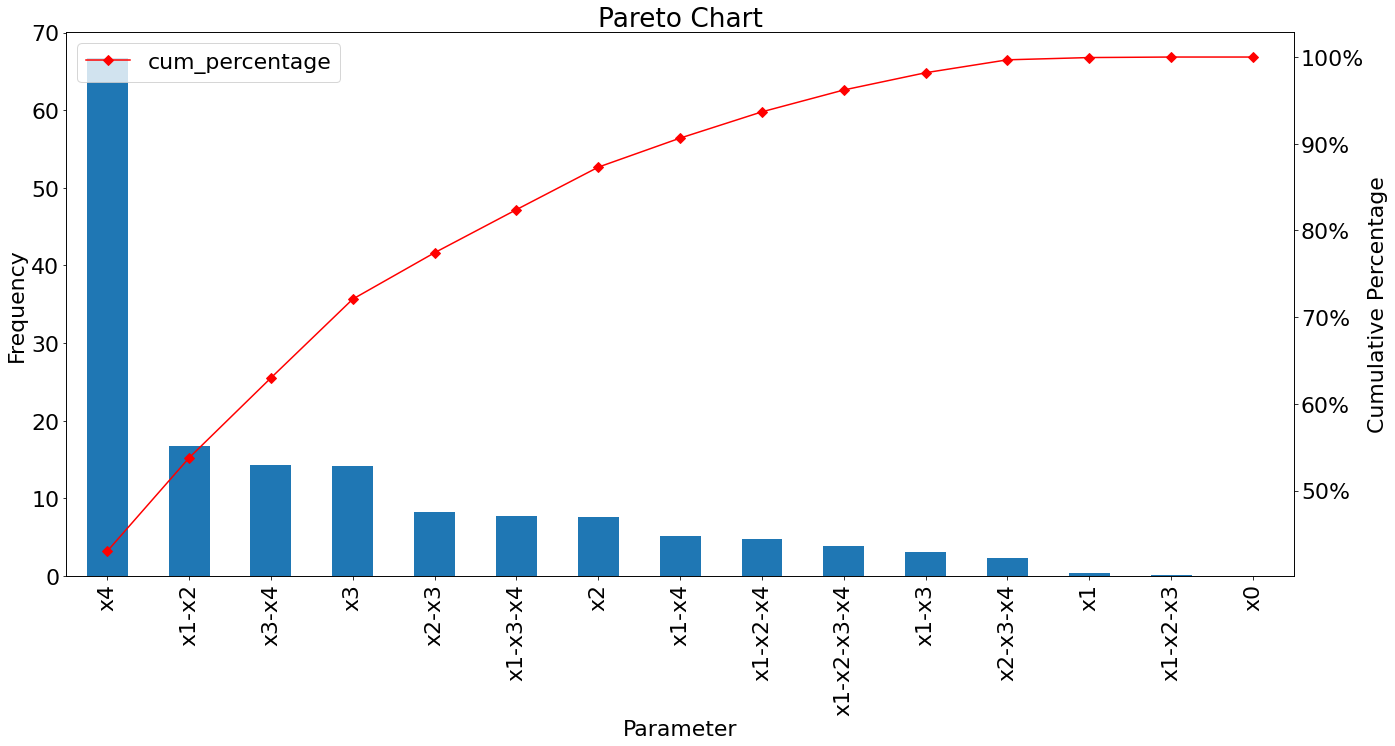

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
master_df
indexes=['dy']
for ii in indexes: 
    effects_df=pd.DataFrame(master_df[ii].abs())
    effects_df = effects_df.sort_values(by=ii, ascending=False)
# Add cumulative percentage column
    effects_df["cum_percentage"] = round(effects_df[ii].cumsum()/effects_df[ii].sum()*100,2)
    plt.rcParams.update({'font.size': 22})
# Set figure and axis
    fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
    ax.set_title("Pareto Chart")
    ax.set_xlabel("Parameter")
    ax.set_ylabel("Frequency");
    effects_df[ii].plot.bar(y='Standardized effect', ax=ax)
#    ax.axhline(2.06, color="orange", linestyle="dashed")

# Second y axis (i.e. cumulative percentage)
    ax2 = ax.twinx()
#ax2.plot(effects_df.index, effects_df["cum_percentage"], color="red", marker="D", ms=7)
    effects_df.plot(y="cum_percentage", color="red", marker="D", ms=7, ax=ax2)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.set_ylabel("Cumulative Percentage");

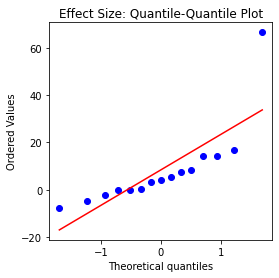

In [5]:
# Quantile-quantile plot of effects:

fig = figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

stats.probplot(master_df['dy'], dist="norm", plot=ax1)
ax1.set_title('Effect Size: Quantile-Quantile Plot')
show()

The largest ordered value in the effects, which is the effect of  x$_4$, is way off by itself. In this region of operational state-space, x$_4$ dominates the system's behavior.